In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

#load dataset
from sklearn.datasets import load_iris
iris = load_iris()
print('Feature:', iris.feature_names)
print('\nTarget:', iris.target_names)
dframe = DataFrame(iris.data, columns=iris.feature_names)
dframe.head(10)

Feature: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [3]:
#Append the target data
dframe['species']=pd.Categorical.from_codes(iris.target, iris.target_names)
dframe.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
140,6.7,3.1,5.6,2.4,virginica
141,6.9,3.1,5.1,2.3,virginica
142,5.8,2.7,5.1,1.9,virginica
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


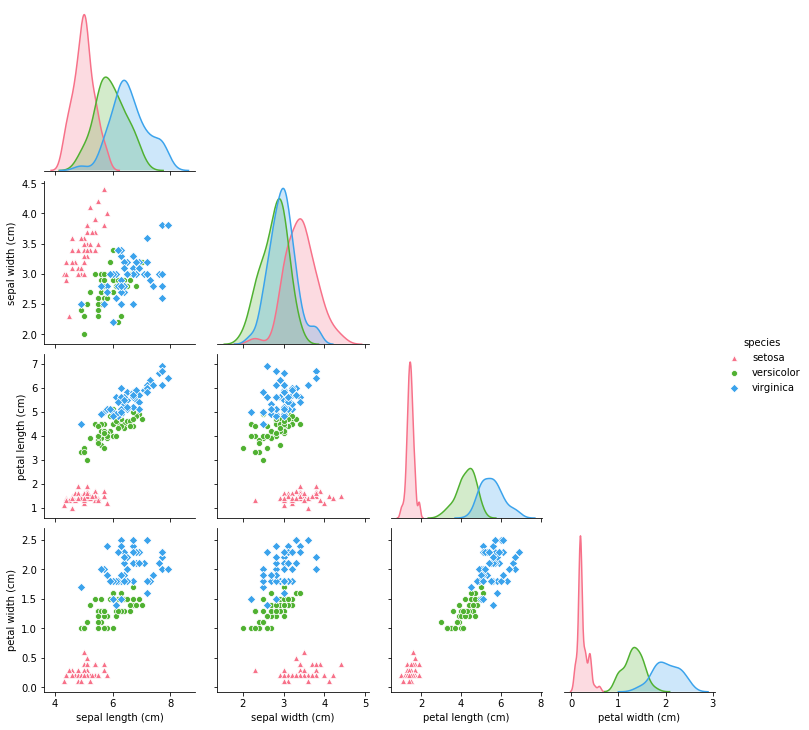

In [4]:
# Visualising data distribution
import seaborn as sns

sns.pairplot(dframe, vars=dframe.columns[dframe.columns!='species'], kind='scatter', diag_kind='kde', hue='species',
             markers=['^','o','D'], palette='husl', height=2.5, corner=True)

In [45]:
# Radomize train and test data set
dframe['Training']=np.random.uniform(0,1,len(dframe))<=.70
print('Count of NAN:\n',dframe.isnull().sum())
dframe.head(10)

Count of NAN:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
Training             0
dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,Training
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,False
2,4.7,3.2,1.3,0.2,setosa,False
3,4.6,3.1,1.5,0.2,setosa,False
4,5.0,3.6,1.4,0.2,setosa,True
5,5.4,3.9,1.7,0.4,setosa,True
6,4.6,3.4,1.4,0.3,setosa,True
7,5.0,3.4,1.5,0.2,setosa,False
8,4.4,2.9,1.4,0.2,setosa,True
9,4.9,3.1,1.5,0.1,setosa,True


In [46]:
# Split dataset into train and test set
train, test = dframe[dframe['Training']==True], dframe[dframe['Training']!=True]
print('Total observations: ', len(dframe))
print('\nTraining observations: ', len(train))
print('\nTesting observations: ', len(test))
train.head()

Total observations:  150

Training observations:  99

Testing observations:  51


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,Training
0,5.1,3.5,1.4,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True
5,5.4,3.9,1.7,0.4,setosa,True
6,4.6,3.4,1.4,0.3,setosa,True
8,4.4,2.9,1.4,0.2,setosa,True


In [58]:
#create a list of feature column's names
attributes=dframe.columns[np.logical_and(dframe.columns!='species',dframe.columns!='Training')]

# encode categorical data or factorize, 
from sklearn.preprocessing import LabelEncoder
labeler = LabelEncoder()
target = DataFrame(labeler.fit_transform(train['species']), index=train['species'].index)
#target = pd.factorize(train['species'])[0]

print(train[attributes].describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count          99.000000         99.000000          99.000000   
mean            5.873737          3.093939           3.810101   
std             0.811221          0.429717           1.753102   
min             4.400000          2.000000           1.000000   
25%             5.200000          2.800000           1.600000   
50%             5.800000          3.000000           4.400000   
75%             6.400000          3.400000           5.100000   
max             7.900000          4.200000           6.700000   

       petal width (cm)  
count         99.000000  
mean           1.223232  
std            0.754825  
min            0.100000  
25%            0.350000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [48]:
#%% Fitting Random Forest Regressor/Classification to dataset
from sklearn.ensemble import RandomForestClassifier #RandomForestRegressor
model = RandomForestClassifier(n_estimators=500, random_state=42)
model.fit(train[attributes],target.values.ravel())
print(model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


,setosa,versicolor,virginica
setosa,18,0,0
versicolor,0,13,0
virginica,0,2,18


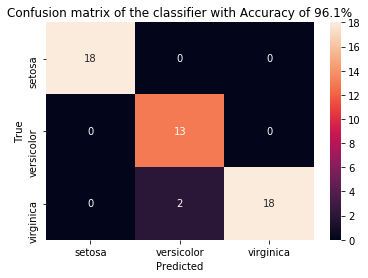

In [57]:
#test prediction
target_pred=model.predict(test[attributes])
target_pred=DataFrame(labeler.inverse_transform(target_pred), index=test['species'].index)

from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score
model_acurracy=accuracy_score(test.species, target_pred)
labels = test.species.unique()
cm = confusion_matrix(test.species, target_pred)
cm = DataFrame(cm,index=labels,columns=labels)
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier with Accuracy of %.1f%%' % (model_acurracy * 100.0))
plt.xlabel('Predicted')
plt.ylabel('True')

cm

In [65]:
#forward prediction

target_pred=model.predict([[5.0, 2.2, 1.4, 2.0],[3.6, 4.0, 6.7, 2.0]])
target_pred=labeler.inverse_transform(target_pred)
target_pred

array(['setosa', 'virginica'], dtype=object)